In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from jax.scipy.optimize import minimize 

from LombScargle import periodogram, psd
from hypothesis_testing.bayes_factor import logB
from simulations.util import  *

An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


In [3]:
known = pd.read_csv('quasars/known.csv')
data= pd.read_csv('data/data.csv')
data= data.sort_values('myid')
period = np.array(data['period'])
period0 = np.array(known['period'])


print(period[13], period0[13])

654.4673 309.7


In [5]:
# setup
key = jax.random.PRNGKey(42)

scratch = '/pscratch/sd/j/jrobnik/quasars/'
#id = jnp.load(scratch + 'ids.npy')[1] # a random id
id = jnp.array(pd.read_csv('quasars/known.csv')['id'], dtype= int)[4]

#hyp = jnp.array([0.1, 120.])
    
df = pd.read_csv(scratch + str(id) + '.csv')
time = jnp.array(df['time'])
mag = jnp.array(df['mag'])
mag_err = jnp.array(df['mag_err'])
#key_time, key_data = jax.random.split(key)
#time= jax.random.uniform(key_time, shape = (1000,)) * 2000
#mag_err= jnp.ones(time.shape) * 0.0

#cov = psd.covariance(time, psd.drw_kernel(*hyp), mag_err)
T = jnp.max(time) - jnp.min(time)
fmin, fmax = 1./T, 1./60.
freq = jnp.logspace(jnp.log10(fmin), jnp.log10(fmax), 1000)
#data = irregular_spaced(key, cov)

#print(logB(time, data, mag_err, freq))

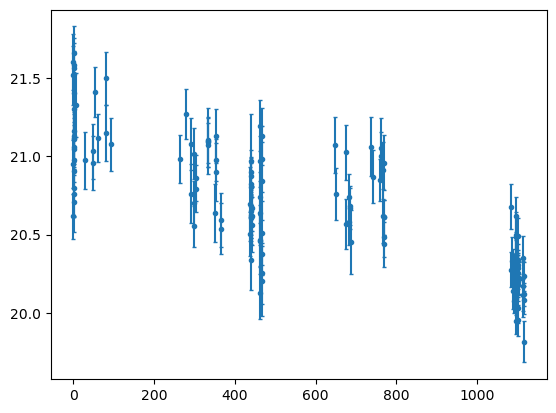

In [6]:
plt.errorbar(time-jnp.min(time), mag, yerr= mag_err, capsize = 1.5, fmt = '.')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot(1./freq, score)
plt.xlabel('period [days]')
plt.ylabel('periodogram score')
plt.savefig('myid_'+str(myid)+'.png')
plt.close()